## Import Libraries

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# processing libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

# model libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics 

## Import Data

In [76]:
df=pd.read_csv("bank_cust_churn.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [77]:
# set variables to category
cat_cols = [
    "gender",
    "country",
    "credit_card",
    "active_member",
    "products_number",
]

df[cat_cols] = df[cat_cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  category
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  category
 8   credit_card       10000 non-null  category
 9   active_member     10000 non-null  category
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(5), float64(2), int64(5)
memory usage: 596.5 KB


## Exploration Data Analysis

### Churn Percentage

C:\Users\USER\AppData\Local\Temp\ipykernel_18100\1593896679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="churn", palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_18100\1593896679.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


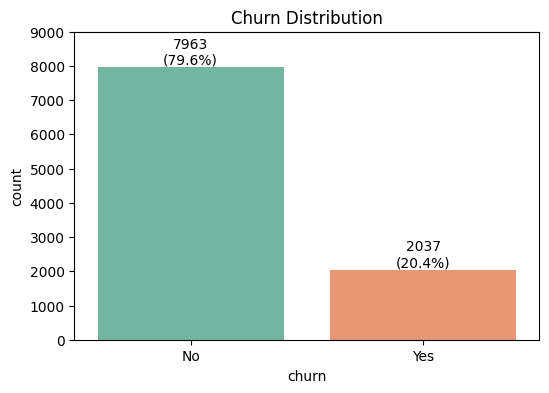

In [48]:
## Churn Distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="churn", palette="Set2")
plt.title("Churn Distribution")
plt.ylim(0, 9000)
# Change labels to Yes/No
ax.set_xticklabels(['No', 'Yes'])

# Calculate total
total = len(df)

# Add count + percentage labels
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        f'{int(height)}\n({percentage})',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

### Churn by Age

C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3139281600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="churn", y="age", palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3139281600.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


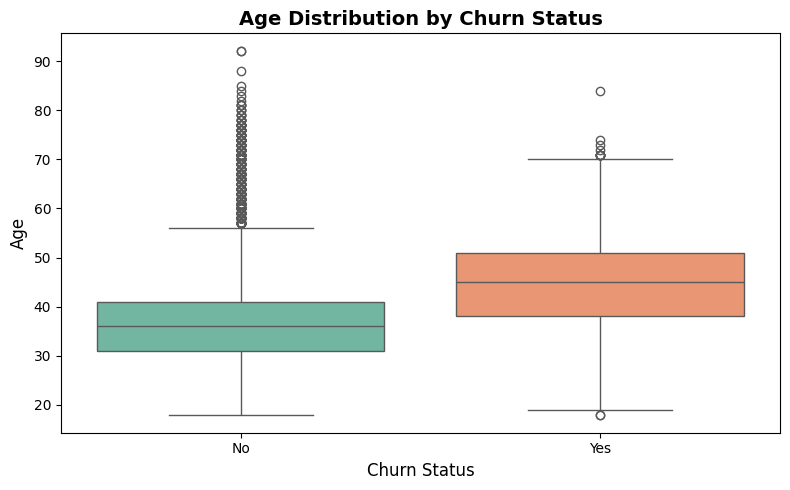

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="churn", y="age", palette="Set2")
plt.title("Age Distribution by Churn Status", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Change labels to Yes/No
ax.set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### Churn by Balance

C:\Users\USER\AppData\Local\Temp\ipykernel_18100\1890430067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="churn", y="balance", palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_18100\1890430067.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


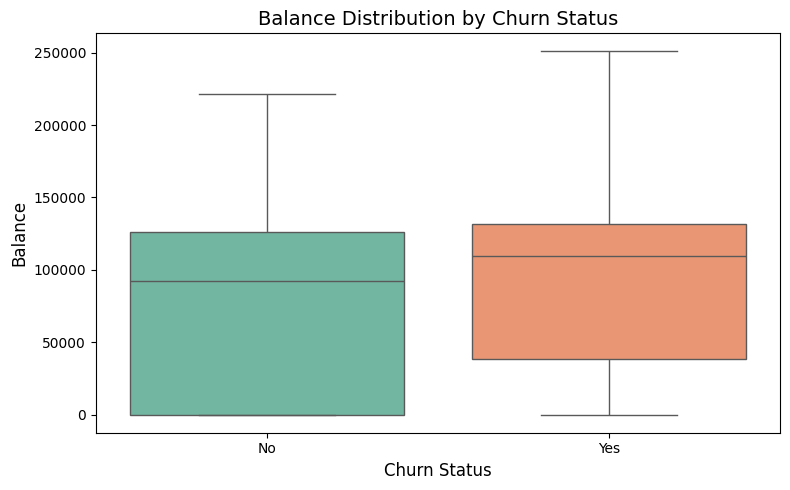

In [49]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="churn", y="balance", palette="Set2")
plt.title("Balance Distribution by Churn Status", fontsize=14)
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Balance", fontsize=12)
# Change labels to Yes/No
ax.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

### Churn by Credit Score

C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3897802205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="churn", y="credit_score", palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3897802205.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


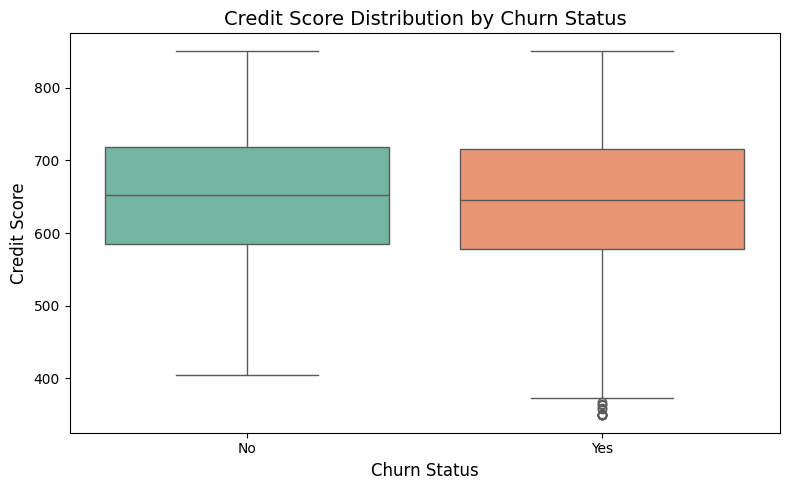

In [50]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="churn", y="credit_score", palette="Set2")
plt.title("Credit Score Distribution by Churn Status", fontsize=14)
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)
# Change labels to Yes/No
ax.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

### Churn by Estimated Salary 

C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3645264520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="churn", y="estimated_salary", palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_18100\3645264520.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


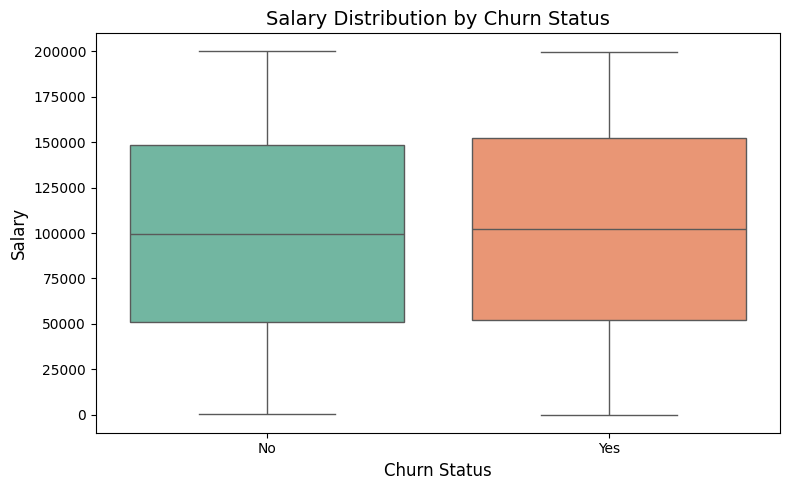

In [51]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, x="churn", y="estimated_salary", palette="Set2")
plt.title("Salary Distribution by Churn Status", fontsize=14)
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Salary", fontsize=12)
# Change labels to Yes/No
ax.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

### Churn by Country

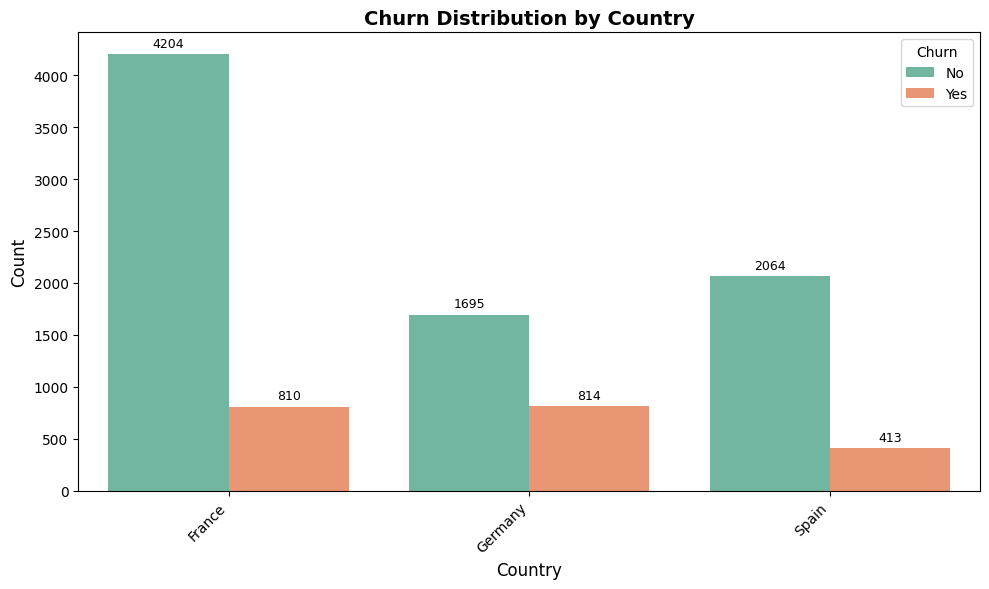

In [56]:
### Churn by Country
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="country", hue="churn", palette="Set2")
plt.title("Churn Distribution by Country", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right')  # Rotate if country names long
plt.legend(title='Churn', labels=['No', 'Yes'])

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

### Country by Gender

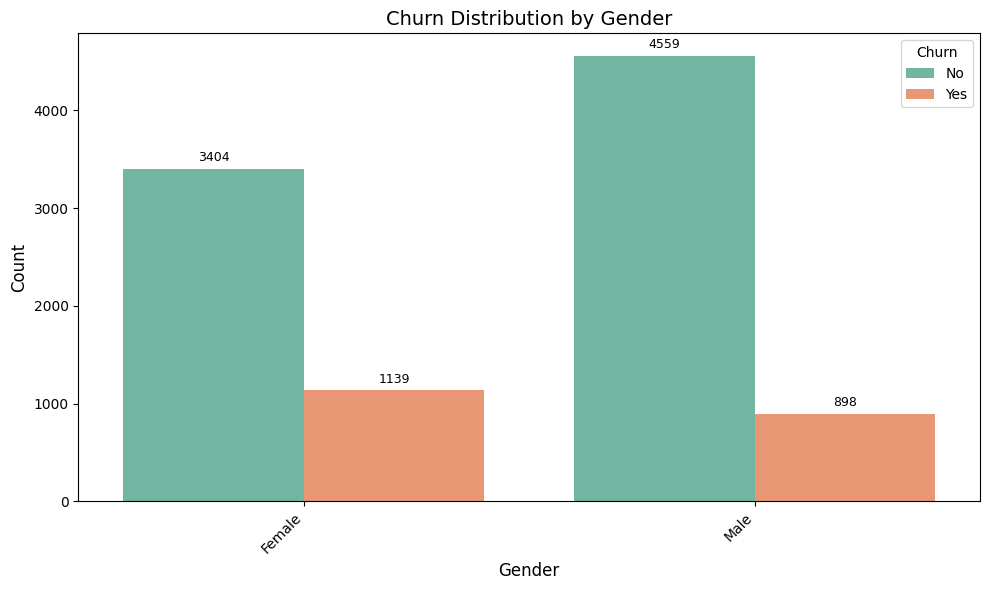

In [57]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="gender", hue="churn", palette="Set2")
plt.title("Churn Distribution by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate if country names long
plt.legend(title='Churn', loc='upper right')

plt.legend(title='Churn', labels=['No', 'Yes'])

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

### Churn by Credit Card

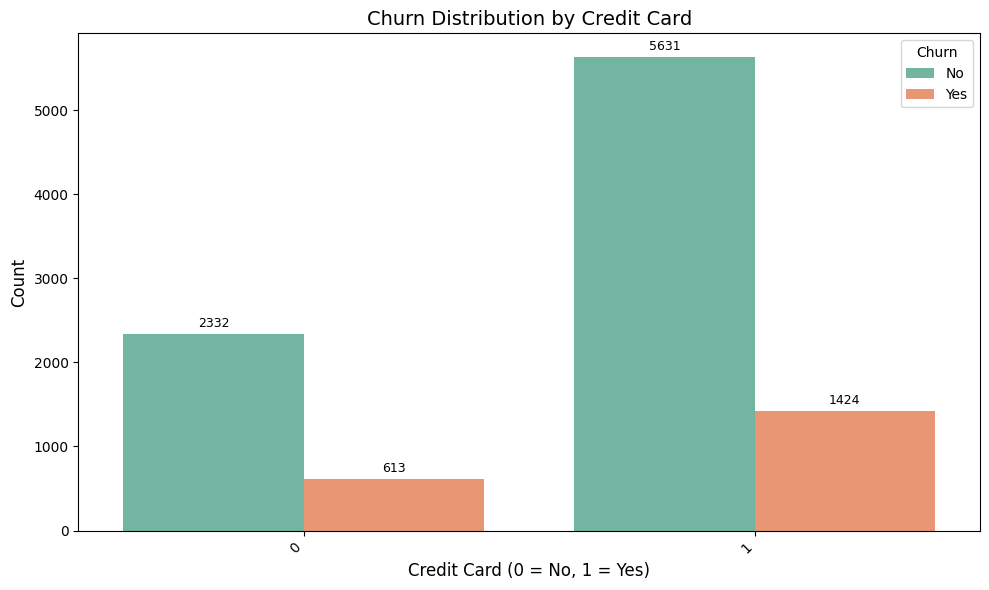

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="credit_card", hue="churn", palette="Set2")
plt.title("Churn Distribution by Credit Card", fontsize=14)
plt.xlabel("Credit Card (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate if country names long
plt.legend(title='Churn', loc='upper right')

plt.legend(title='Churn', labels=['No', 'Yes'])

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

### Churn by Active Member

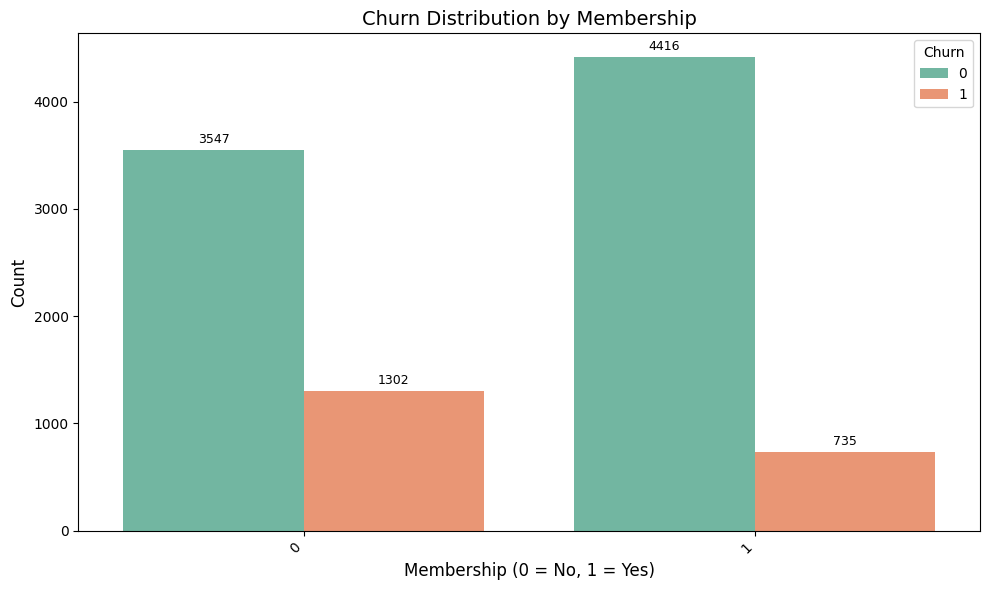

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="active_member", hue="churn", palette="Set2")
plt.title("Churn Distribution by Membership", fontsize=14)
plt.xlabel("Membership (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate if country names long
plt.legend(title='Churn', loc='upper right')

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

### Churn by Products Number

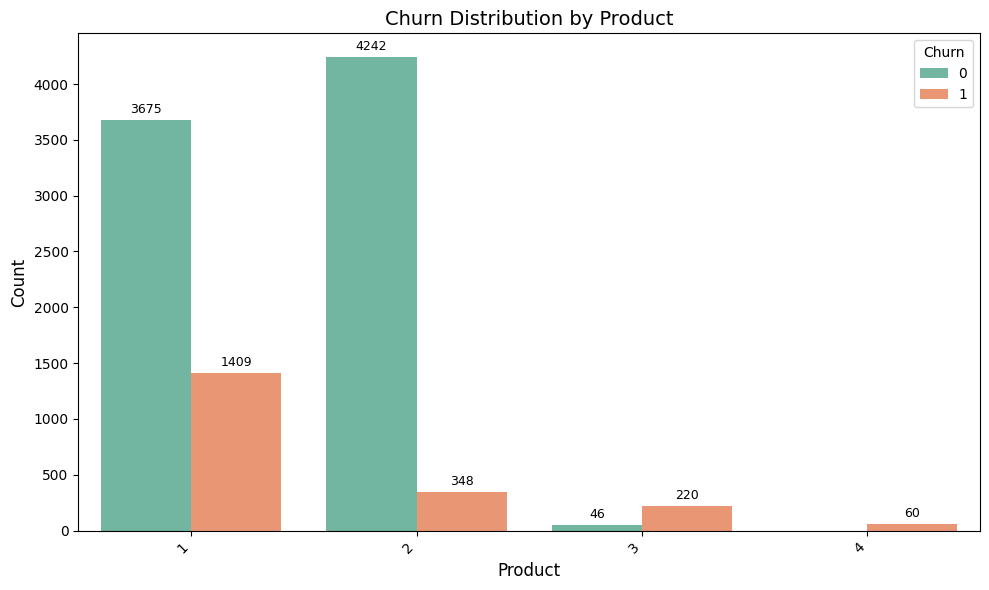

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="products_number", hue="churn", palette="Set2")
plt.title("Churn Distribution by Product", fontsize=14)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate if country names long
plt.legend(title='Churn', loc='upper right')

# Add count labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

## Splitting Data

In [80]:
for col in cat_cols:
    df[col] = df[col].cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int8   
 3   gender            10000 non-null  int8   
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int8   
 8   credit_card       10000 non-null  int8   
 9   active_member     10000 non-null  int8   
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(5), int8(5)
memory usage: 595.8 KB


In [82]:
# Check churn encoding
print("Churn values:")
print(df['churn'].value_counts())
print(f"Churn dtype: {df['churn'].dtype}")

# Since churn is already 0/1, just use it directly
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']  # ← CHANGED: No mapping needed!

# OR to be extra safe:
# y = df['churn'].astype(int)

# Verify no NaN
print(f"\nNaN in X: {X.isnull().sum().sum()}")
print(f"NaN in y: {y.isna().sum()}")

# If X has NaN, handle it
if X.isnull().sum().sum() > 0:
    print("\n⚠ X has NaN, cleaning...")
    # Option 1: Drop rows with NaN
    mask = ~X.isnull().any(axis=1)
    X = X[mask]
    y = y[mask]
    
    # OR Option 2: Fill NaN
    # X = X.fillna(X.median())  # for numeric
    # X = X.fillna(X.mode().iloc[0])  # for categorical

print(f"\nFinal dataset: {len(X)} rows")
print(f"Churn distribution:\n{y.value_counts()}")


# Now split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # Keep same churn ratio
    random_state=42
)

print(f"\nTrain: {len(X_train)} | Test: {len(X_test)}")
print(f"Train churn rate: {y_train.mean():.1%}")
print(f"Test churn rate: {y_test.mean():.1%}")

Churn values:
churn
0    7963
1    2037
Name: count, dtype: int64
Churn dtype: int64

NaN in X: 0
NaN in y: 0

Final dataset: 10000 rows
Churn distribution:
churn
0    7963
1    2037
Name: count, dtype: int64

Train: 8000 | Test: 2000
Train churn rate: 20.4%
Test churn rate: 20.3%


## Random Forest